In [4]:
%pylab inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas_datareader.data as web
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [16]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = web.DataReader(symbol, 'google', start, end)
    data=pd.DataFrame(data)
    prices=data['Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

def get_returns(prices):
    return (prices-prices.shift(-1))/prices

def sort_data(rets):
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)

In [17]:
# separate data into inputs and outputs for training and testing
gs = get_prices('GS')
rets = get_returns(gs)
ins, outs = sort_data(rets)
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]

In [32]:
print(test_ins)

[[-0.01878741 -0.00407213 -0.00961761 ..., -0.01028454  0.00316706
   0.00487916]
 [-0.00407213 -0.00961761  0.00430391 ...,  0.00316706  0.00487916
  -0.00313569]
 [-0.00961761  0.00430391  0.02086335 ...,  0.00487916 -0.00313569
   0.00233021]
 ..., 
 [ 0.02340544  0.01234632 -0.00929671 ...,  0.01533878  0.00102993
   0.03080095]
 [ 0.01234632 -0.00929671  0.00827435 ...,  0.00102993  0.03080095
   0.0008643 ]
 [-0.00929671  0.00827435 -0.01621451 ...,  0.03080095  0.0008643
  -0.01277615]]


In [18]:
sess = tf.InteractiveSession()

In [25]:
# we define two placeholders for our input and output
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

# we define trainable variables for our model
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

# we define our model: y = W*x + b
y = tf.matmul(x, W) + b

#MSE:
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

In [27]:
# initialize variables to random values
init = tf.global_variables_initializer()
sess.run(init)
# run optimizer on entire training data set many times
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
    # every 1000 iterations record progress
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.014585411
Epoch: 2000 cost= 0.004562563
Epoch: 3000 cost= 0.001888341
Epoch: 4000 cost= 0.001065421
Epoch: 5000 cost= 0.000789276
Epoch: 6000 cost= 0.000691074
Epoch: 7000 cost= 0.000654672
Epoch: 8000 cost= 0.000640742
Epoch: 9000 cost= 0.000635271
Epoch: 10000 cost= 0.000633075
Epoch: 11000 cost= 0.000632177
Epoch: 12000 cost= 0.000631803
Epoch: 13000 cost= 0.000631645
Epoch: 14000 cost= 0.000631578
Epoch: 15000 cost= 0.000631548
Epoch: 16000 cost= 0.000631535
Epoch: 17000 cost= 0.000631530
Epoch: 18000 cost= 0.000631527
Epoch: 19000 cost= 0.000631526
Epoch: 20000 cost= 0.000631526


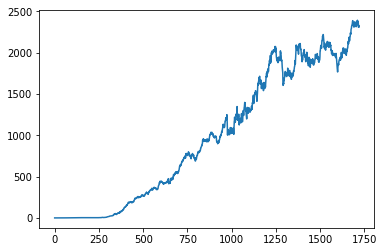

In [34]:
#train results :)
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * train_outs
plot(np.cumprod(returns+1))

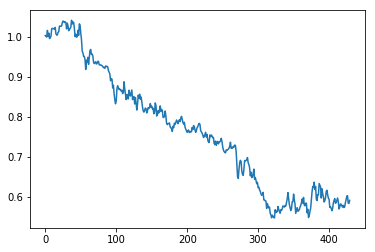

In [35]:
#test results :(
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * test_outs
plot(np.cumprod(returns+1))